In [1]:
import cv2
import numpy as np
import openvino.runtime as ov
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
model_path = r"D:/ml/code/anomalib/results/fastflow/mvtec/bottle/run/weights/openvino/model.onnx"

# opencv

In [34]:
model = cv2.dnn.readNetFromONNX(model_path)
model

< cv2.dnn.Net 000001A0D593D870>

In [19]:
x = np.ones((1, 3, 256, 256), dtype=np.float32)
x.dtype

dtype('float32')

In [20]:
model.setInput(x)

In [21]:
opencv_output = model.forward("output")
opencv_output.shape

(1, 1, 256, 256)

# openvino

In [22]:
core = ov.Core()
ov_model = core.read_model(model_path)
compiled_model = core.compile_model(ov_model, device_name="CPU")
compiled_model

<CompiledModel:
inputs[
<ConstOutput: names[input] shape[?,3,256,256] type: f32>
]
outputs[
<ConstOutput: names[output] shape[?,1,256,256] type: f32>,
<ConstOutput: names[574] shape[?] type: f32>
]>

In [23]:
compiled_model.outputs

[<ConstOutput: names[output] shape[?,1,256,256] type: f32>,
 <ConstOutput: names[574] shape[?] type: f32>]

In [24]:
results = compiled_model([x])
results.keys()

dict_keys([<ConstOutput: names[output] shape[?,1,256,256] type: f32>, <ConstOutput: names[574] shape[?] type: f32>])

In [25]:
openvino_result = results[compiled_model.outputs[0]]
openvino_result.shape

(1, 1, 256, 256)

# compare result

In [26]:
np.all(np.isclose(opencv_output, openvino_result))

False

In [27]:
opencv_output.min(), opencv_output.max(), opencv_output.mean(), opencv_output.std()

(-0.0069959993, 0.0, -2.3150644e-06, 9.468477e-05)

In [28]:
openvino_result.min(), openvino_result.max(), openvino_result.mean(), openvino_result.std()

(20.409893, 61.292767, 50.740402, 8.288312)

<Axes: ylabel='Count'>

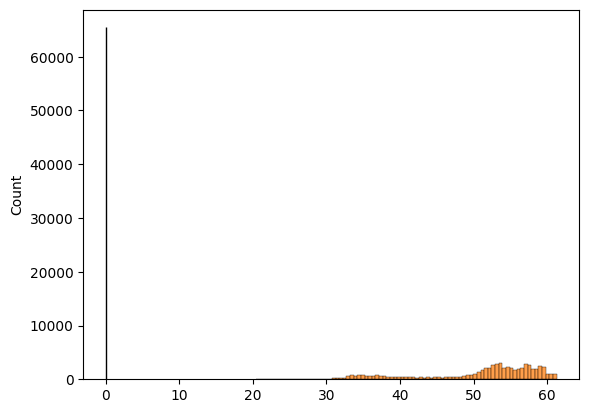

In [29]:
sns.histplot(opencv_output.reshape(-1))
sns.histplot(openvino_result.reshape(-1))